# Healthcare Insurance Analysis

The objective of this project is to predict patients’ healthcare costs and to identify factors
contributing to this prediction. It will also be useful to learn the interdependencies of
different factors and comprehend the significance of various tools at various stages of
the healthcare cost prediction process.

### Step 1 : Import Libraries and Load Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load DataSets 

In [2]:
names_df = pd.read_excel('Names.xlsx')
medical_examinations_df = pd.read_csv('Medical Examinations.csv')
hospitalisation_details_df = pd.read_csv('Hospitalisation details.csv')

In [3]:
names_df.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [4]:
medical_examinations_df.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [5]:
hospitalisation_details_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


### Step 2 : Check for missing Values 

In [6]:
names_df.isnull().sum()

Customer ID    0
name           0
dtype: int64

In [7]:
hospitalisation_details_df.isnull().sum()

Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64

In [8]:
medical_examinations_df.isnull().sum()

Customer ID               0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

### As analyzed the datasets and checked for missing values. Here is the summary:

- Names Dataset: No missing values.
- Medical Examinations Dataset: No missing values.
- Hospitalisation Details Dataset: No missing values.
- With no missing values in these datasets, we can proceed to merge them on the Customer ID column.

### Step 3 : Merge the Datasets

In [9]:
merged_df = pd.merge(names_df,medical_examinations_df,on='Customer ID')
merged_df = pd.merge(merged_df,hospitalisation_details_df,on='Customer ID')

In [10]:
merged_df.head()

,Customer ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
2,Id3,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012


### Step 4 : Identifying rows with trivial values ('?')

In [11]:
trivial_rows = merged_df.isin(['?']).sum()

In [12]:
trivial_rows

Customer ID               0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    2
year                      2
month                     3
date                      0
children                  0
charges                   0
Hospital tier             1
City tier                 1
State ID                  2
dtype: int64

In [13]:
# Calculating the percentage of rows that have trivial values
total_rows = merged_df.shape[0]
trivial_percentage = (trivial_rows / total_rows) * 100

In [14]:
# Finding and removing rows with trivial values if they do not contain significant information
columns_with_trivial = trivial_rows[trivial_rows > 0].index
rows_with_trivial = merged_df[merged_df[columns_with_trivial].isin(['?']).any(axis=1)]
rows_to_delete = rows_with_trivial.index

In [15]:
# Removing the rows with trivial values
cleaned_df = merged_df.drop(rows_to_delete)

In [16]:
# Displaying the trivial value statistics
trivial_value_stats = pd.DataFrame({
    'Trivial Values': trivial_rows,
    'Percentage of Trivial Rows': trivial_percentage
})

In [17]:
trivial_value_stats 

,Trivial Values,Percentage of Trivial Rows
Customer ID,0,0.000000
name,0,0.000000
BMI,0,0.000000
HBA1C,0,0.000000
Heart Issues,0,0.000000
Any Transplants,0,0.000000
Cancer history,0,0.000000
NumberOfMajorSurgeries,0,0.000000
smoker,2,0.085653
year,2,0.085653


In [18]:
cleaned_df

,Customer ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
5,Id6,"Baker, Mr. Russell B.",32.800,6.59,No,No,No,No major surgery,yes,1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id2331,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
2332,Id2333,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
2333,Id2334,"Rosendahl, Mr. Evan P",17.600,4.39,No,No,No,1,No,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013


### Step 5 : Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [19]:
# Display unique values in the 'month' column to identify non-numeric entries
unique_months = cleaned_df['month'].unique()

unique_months

array(['Oct', 'Jun', 'Aug', 'Sep', 'Dec', 'Jul', 'Nov'], dtype=object)

### The month column contains non-numeric month abbreviations.
Map these month abbreviations to their corresponding numeric values and then proceed with the date conversion and age calculation.

Month Mapping:
'Jun' -> 6
'Jul' -> 7
'Aug' -> 8
'Sep' -> 9
'Nov' -> 11
'Dec' -> 12

In [20]:
# Creating the month mapping
month_mapping = {
    'Jun':6,'Jul':7,'Aug':8, 'Sep':9,'Oct':10,'Nov':11,'Dec':12
}

# Applying the month mapping to the 'month' column
cleaned_df['month'] = cleaned_df['month'].map(month_mapping)

In [21]:
cleaned_df['month'].head()

0    10
1     6
3     6
4     6
5     8
Name: month, dtype: int64

In [22]:
#Age appears to be a significant factor in this analysis. Calculate the patients' ages based on theirdates of birth
cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')
cleaned_df['month'] = pd.to_numeric(cleaned_df['month'], errors='coerce')
cleaned_df['date'] = pd.to_numeric(cleaned_df['date'], errors='coerce')

# Convert the corrected date components to a proper date format
cleaned_df['birth_date'] = pd.to_datetime(cleaned_df[['year', 'month', 'date']].dropna().rename(columns={'year': 'year', 'month': 'month', 'date': 'day'}), errors='coerce')

# Recalculate age
cleaned_df['age'] = (pd.to_datetime('today') - cleaned_df['birth_date']).dt.days // 365

# Drop the intermediate date columns
cleaned_df.drop(columns=['year', 'month', 'date', 'birth_date'], inplace=True)

In [23]:
# Handling categorical variables
# Ordinal Encoding for Hospital tier and City tier
hospital_tier_mapping = {'tier - 1': 1, 'tier - 2': 2, 'tier - 3': 3}
city_tier_mapping = {'tier - 1': 1, 'tier - 2': 2, 'tier - 3': 3}

cleaned_df['Hospital tier'] = cleaned_df['Hospital tier'].map(hospital_tier_mapping)
cleaned_df['City tier'] = cleaned_df['City tier'].map(city_tier_mapping)

In [24]:
# Getting Unique State ID 
cleaned_df['State ID'].unique()

array(['R1013', 'R1024', 'R1012', 'R1011', 'R1016', 'R1015', 'R1017',
       'R1014', 'R1023', 'R1019', 'R1018', 'R1026', 'R1022', 'R1021',
       'R1025', 'R1020'], dtype=object)

In [25]:
# One-Hot Encoding for categorical variables including all categories for State ID
encoded_df = pd.get_dummies(cleaned_df, columns=['Heart Issues', 'Any Transplants', 'Cancer history', 'smoker', 'State ID'])

# Display the columns to verify inclusion of all State IDs
encoded_df.columns

Index(['Customer ID', 'name', 'BMI', 'HBA1C', 'NumberOfMajorSurgeries',
       'children', 'charges', 'Hospital tier', 'City tier', 'age',
       'Heart Issues_No', 'Heart Issues_yes', 'Any Transplants_No',
       'Any Transplants_yes', 'Cancer history_No', 'Cancer history_Yes',
       'smoker_No', 'smoker_yes', 'State ID_R1011', 'State ID_R1012',
       'State ID_R1013', 'State ID_R1014', 'State ID_R1015', 'State ID_R1016',
       'State ID_R1017', 'State ID_R1018', 'State ID_R1019', 'State ID_R1020',
       'State ID_R1021', 'State ID_R1022', 'State ID_R1023', 'State ID_R1024',
       'State ID_R1025', 'State ID_R1026'],
      dtype='object')

In [26]:
# Replacing 'No major surgery' with 0
encoded_df['NumberOfMajorSurgeries'] = encoded_df['NumberOfMajorSurgeries'].replace('No major surgery', 0)

# Converting the column to numeric
encoded_df['NumberOfMajorSurgeries'] = pd.to_numeric(encoded_df['NumberOfMajorSurgeries'])

In [27]:
# Function to determine gender based on salutation
def extract_gender(name):
    if 'Mr.' in name:
        return 'Male'
    elif 'Ms.' in name or 'Mrs.' in name:
        return 'Female'
    else:
        return 'Unknown'

# Applying the function to create a new 'gender' column
encoded_df['gender'] = encoded_df['name'].apply(extract_gender)

# Transformed Data
#### The dataset has been successfully transformed with the following steps:

- Mapped Non-Numeric Months: Converted month abbreviations to their corresponding numeric values.
- Calculated Age: Calculated the age of patients based on their date of birth.
- Ordinal Encoding: Applied ordinal encoding to Hospital tier and City tier.
- One-Hot Encoding: Applied one-hot encoding to other categorical variables (Heart Issues, Any Transplants, Cancer history, smoker, State ID).
- Transformed NumberOfMajorSurgeries to Numeric Values 
- Created new column for gender of the patient

In [28]:
encoded_df.head()

,Customer ID,name,BMI,HBA1C,NumberOfMajorSurgeries,children,charges,Hospital tier,City tier,age,...,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026,gender
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,63770.43,1,3,55,...,False,False,False,False,False,False,False,False,False,Female
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,62592.87,2,3,47,...,False,False,False,False,False,False,False,False,False,Male
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,1,58571.07,1,3,33,...,False,False,False,False,False,False,True,False,False,Female
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,55135.40,1,2,35,...,False,False,False,False,False,False,False,False,False,Female
5,Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,52590.83,1,3,62,...,False,False,False,False,False,False,False,False,False,Male


### Step 6: Data Visualization

### Visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

In [29]:
# Set up the plotting environment
sns.set(style="whitegrid")

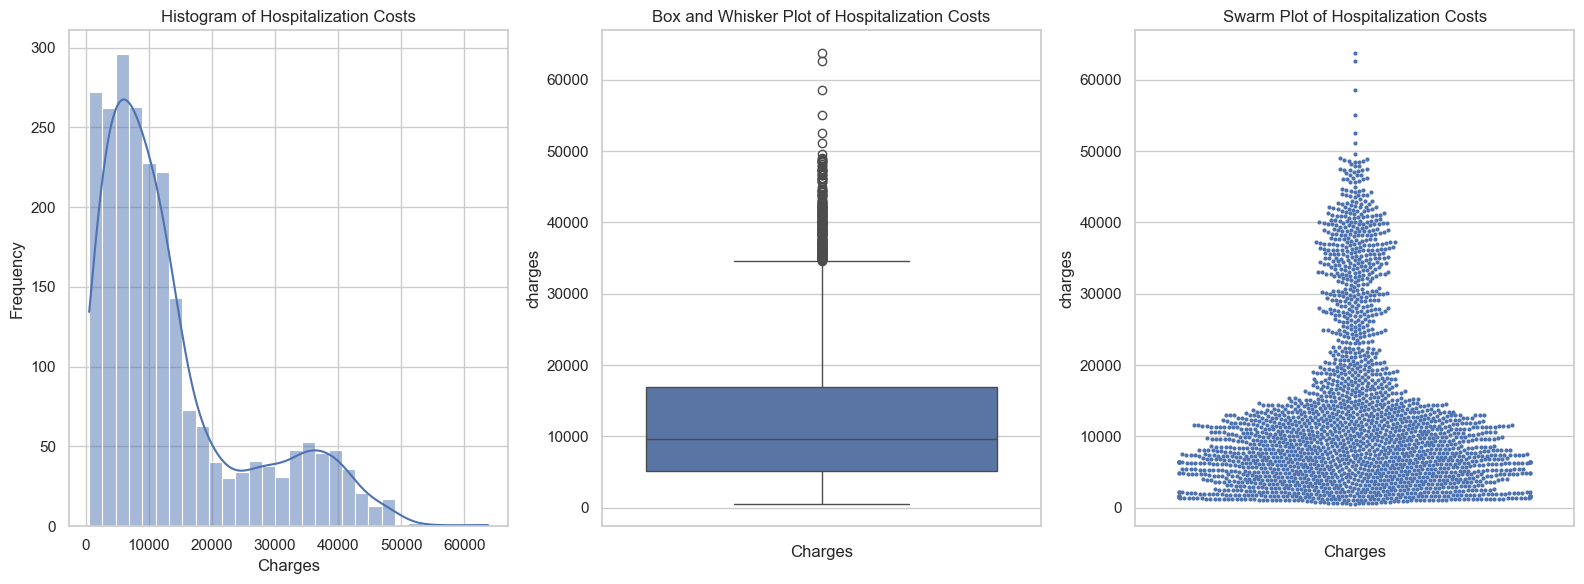

In [30]:
plt.figure(figsize=(16,6))

#Histogram 
plt.subplot(1,3,1)
sns.histplot(encoded_df['charges'],bins=30,kde=True)
plt.title('Histogram of Hospitalization Costs')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Box and Whisker Plot
plt.subplot(1,3,2)
sns.boxplot(y = encoded_df['charges'])
plt.title('Box and Whisker Plot of Hospitalization Costs')
plt.xlabel('Charges')

# Swarm Plot
plt.subplot(1, 3, 3)
sns.swarmplot(y=encoded_df['charges'], size=3)
plt.title('Swarm Plot of Hospitalization Costs')
plt.xlabel('Charges')

plt.tight_layout()
plt.show()

### Distribution across gender and hospital tiers

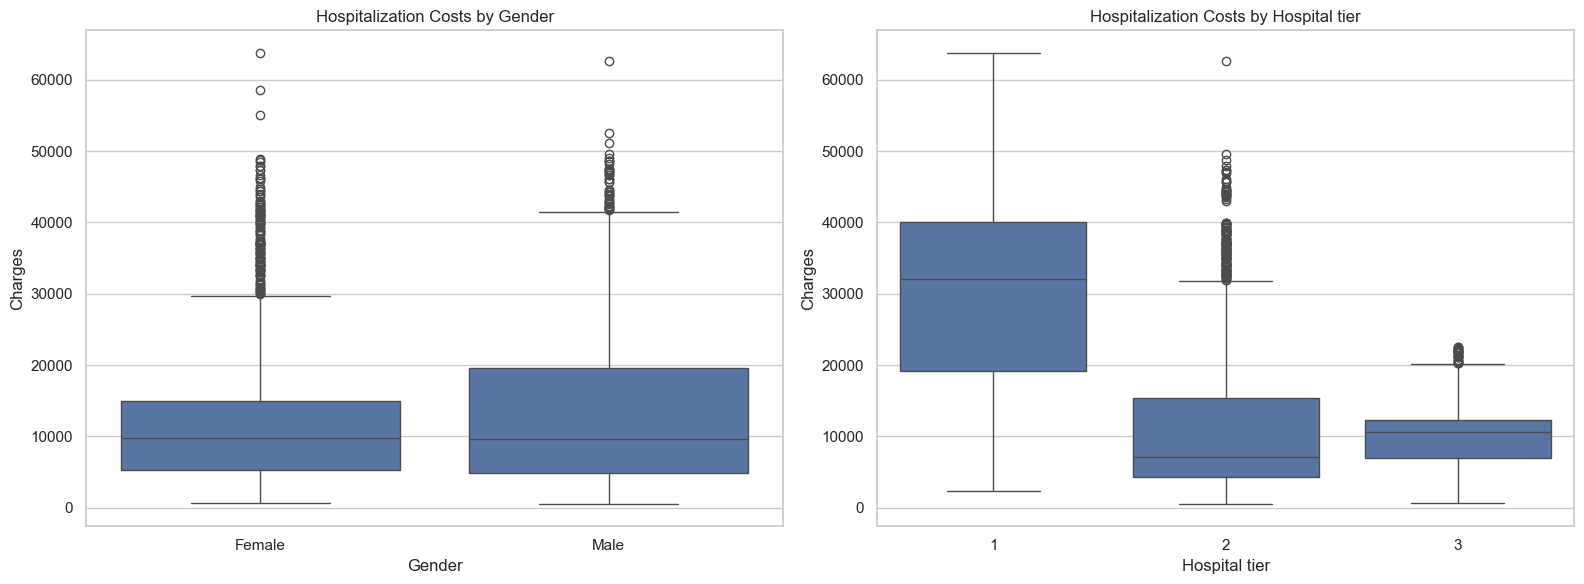

In [31]:
plt.figure(figsize=(16,6))

# Charges by gender
plt.subplot(1,2,1)
sns.boxplot(x='gender',y='charges',data=encoded_df)
plt.title('Hospitalization Costs by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')

# Charges by Hospital Tier
plt.subplot(1,2,2)
sns.boxplot(x='Hospital tier',y='charges',data=encoded_df)
plt.title('Hospitalization Costs by Hospital tier')
plt.xlabel('Hospital tier')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

### Radar Chart for Median Hospitalization Costs by Hospital Tier

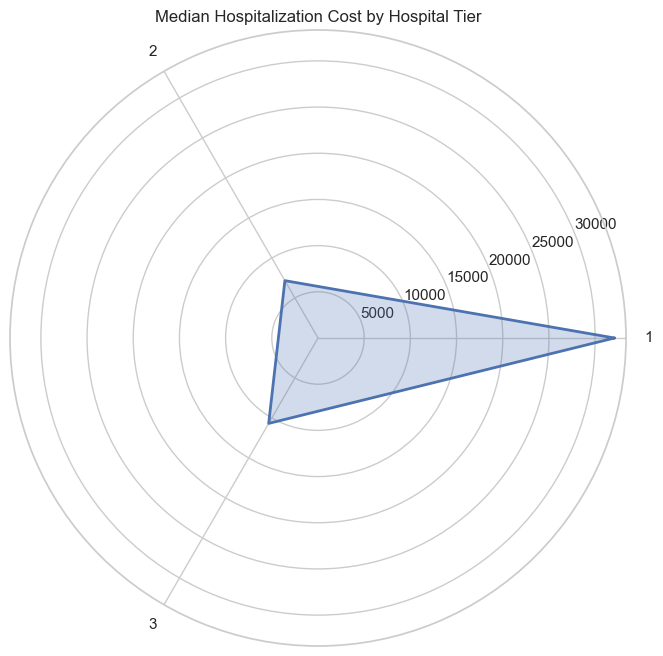

In [32]:
median_charges_by_tier = encoded_df.groupby('Hospital tier')['charges'].median()
categories = list(median_charges_by_tier.index)
values = list(median_charges_by_tier.values)

# Radar Chart
fig, ax = plt.subplots(figsize=(8,8),subplot_kw=dict(polar=True))
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi,num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

ax.fill(angles, values, color='b',alpha=0.25)
ax.plot(angles, values, color='b',linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Median Hospitalization Cost by Hospital Tier')
plt.show()

### Frequency table and stacked bar chart for tiers of cities and hospitals

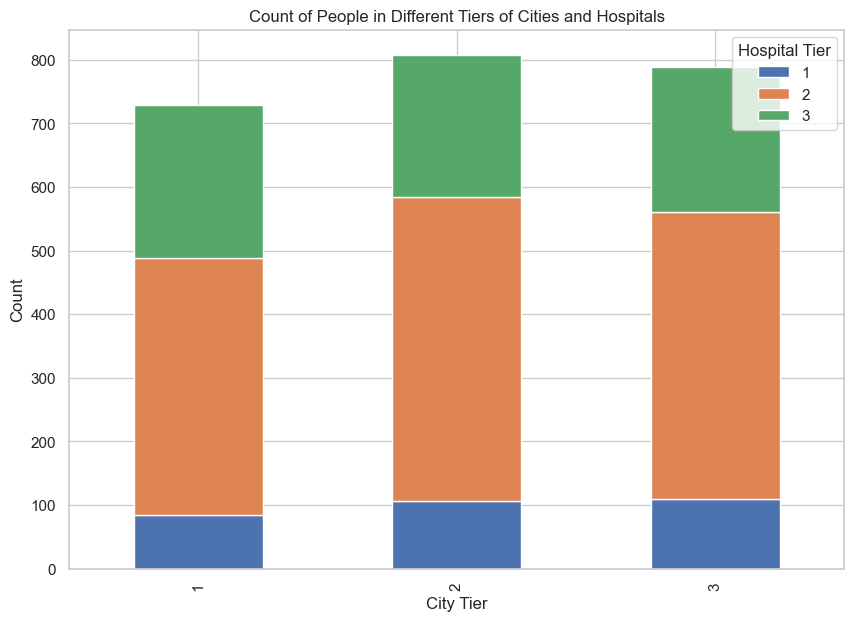

In [33]:
# Frequency table 
frequency_table = pd.crosstab(encoded_df['City tier'],encoded_df['Hospital tier'])

#Stacked Bar Chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Count of People in Different Tiers of Cities and Hospitals')
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.legend(title='Hospital Tier')
plt.show()

## Step 7 : Null Hypothesis Testing 

### To test the null Hypothesis, we will use appropriate statistical tests:

- ANOVA: To compare means across multiple groups (for hospital and city tiers).
- t-test: To compare means between two groups (for smokers and nonsmokers).
- Chi-Square test: To test the independence between two categorical variables (smoking and heart issues).

### Hypothesis a: The average hospitalization costs for the three types of hospitals are not significantly different.
- ANOVA: To compare means across multiple groups (for hospital and city tiers).

In [34]:
import scipy.stats as stats

# Filter out rows with 'Unknown' in 'Hospital tier'
valid_hospital_data = encoded_df[encoded_df['Hospital tier'] != 'Unknown']

# Perform ANOVA 
anova_result_hospital = stats.f_oneway(
    valid_hospital_data[valid_hospital_data['Hospital tier'] == 1]['charges'],
    valid_hospital_data[valid_hospital_data['Hospital tier'] == 2]['charges'],
    valid_hospital_data[valid_hospital_data['Hospital tier'] == 3]['charges']
)

anova_result_hospital.pvalue

1.7738221310855688e-179

### Hypothesis b: The average hospitalization costs for the three types of cities are not significantly different.

In [35]:
# Filter out rows with 'Unknown' in 'City tier'
valid_city_data = encoded_df[encoded_df['City tier'] != 'Unknown']

# Perform ANOVA
anova_result_city = stats.f_oneway(
    valid_city_data[valid_city_data['City tier'] == 1]['charges'],
    valid_city_data[valid_city_data['City tier'] == 2]['charges'],
    valid_city_data[valid_city_data['City tier'] == 3]['charges']
)

anova_result_city.pvalue

0.23376344386881315

### Hypothesis c: The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.

- t-test: To compare means between two groups (for smokers and nonsmokers).

In [36]:
# Perform t-test
t_test_result_smoking = stats.ttest_ind(
    cleaned_df[cleaned_df['smoker'] == 'yes']['charges'],
    cleaned_df[cleaned_df['smoker'] == 'No']['charges']

)

t_test_result_smoking.pvalue

0.0

- Hypothesis d: Smoking and heart issues are independent.

- Chi-Square test: To test the independence between two categorical variables (smoking and heart issues).

In [37]:
# Create a contingency table
contingency_table = pd.crosstab(encoded_df['smoker_yes'], encoded_df['Heart Issues_yes'])

# Perform Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

p

0.7694797581780767

In [38]:
# Display results
print("ANOVA Hospital Tiers p-value:", anova_result_hospital.pvalue)
print("ANOVA City Tiers p-value:", anova_result_city.pvalue)
print("t-test Smokers vs Nonsmokers p-value:", t_test_result_smoking.pvalue)
print("Chi-Square Smoking and Heart Issues p-value:", p)

ANOVA Hospital Tiers p-value: 1.7738221310855688e-179
ANOVA City Tiers p-value: 0.23376344386881315
t-test Smokers vs Nonsmokers p-value: 0.0
Chi-Square Smoking and Heart Issues p-value: 0.7694797581780767


## Interpretation :
- ANOVA Hospital Tiers p-value: 1.7738221310855688e-179 : 
The p-value is extremely small (much less than 0.05), indicating that there is a significant difference in the average hospitalization costs among the three types of hospitals. Therefore, we reject the null hypothesis.

- ANOVA City Tiers p-value: 0.23376344386881315 :
The p-value is greater than 0.05, indicating that there is no significant difference in the average hospitalization costs among the three types of cities. Therefore, we fail to reject the null hypothesis.

- t-test Smokers vs Nonsmokers p-value: 0.0 :
The p-value is extremely small (less than 0.05), indicating that there is a significant difference in the average hospitalization costs between smokers and nonsmokers. Therefore, we reject the null hypothesis.

- Chi-Square Smoking and Heart Issues p-value: 0.7694797581780767 :
The p-value is greater than 0.05, indicating that there is no significant association between smoking and heart issues. Therefore, we fail to reject the null hypothesis.

## Summary of Results

- Hospital Tiers: There is a significant difference in average hospitalization costs among different hospital tiers.
- City Tiers: There is no significant difference in average hospitalization costs among different city tiers.
- Smoking Status: There is a significant difference in average hospitalization costs between smokers and nonsmokers.
- Smoking and Heart Issues: Smoking and heart issues are independent; there is no significant association between them.

## Step 8 : Machine learning

- Examine the correlation between predictors to identify highly correlated predictors

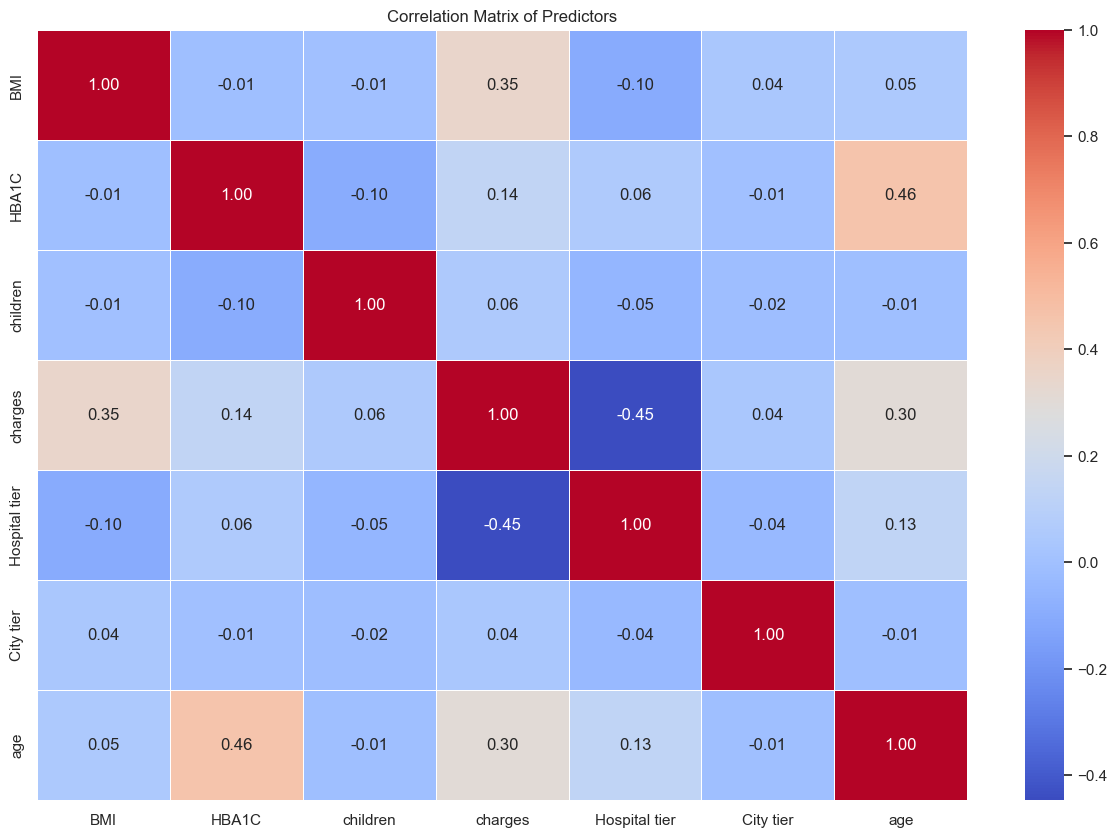

In [39]:
# Compute the correlation matrix
corr_matrix = cleaned_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f',cbar=True)
plt.title('Correlation Matrix of Predictors')
plt.show()

# Model Building 
Let's develop a regression model to predict hospitalization costs. We will:

- Split the data into training and testing sets.
- Standardize the data.
- Develop and evaluate both Linear and Ridge regression models using k-fold cross-validation.
- Implement a Gradient Boosting model to determine variable importance.


### Import Libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# Data Splitting
X = encoded_df.drop(columns=['charges','Customer ID','name','gender'])
y = encoded_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
# Model Development and Evaluation
# Linear Regression
linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
linear_rmse_scores = (-linear_scores)** 0.5

print("Linear Regression RMSE scores : ", linear_rmse_scores)
print("Linear Regression Mean RMSE: ", linear_rmse_scores.mean())

Linear Regression RMSE scores :  [4578.34940585 4180.79798844 4887.65801716 3874.05354622 4737.86520229]
Linear Regression Mean RMSE:  4451.744831989391


In [44]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression Model with hyperParameter Tuning 
ridge = Ridge()
param_grid = {'alpha': [0.1,1,10,100]}
ridge_search = GridSearchCV(ridge,param_grid,cv=5,scoring='neg_mean_squared_error')
ridge_search.fit(X_train_scaled,y_train)
ridge_best = ridge_search.best_estimator_
ridge_scores = cross_val_score(ridge_best, X_train_scaled,y_train,cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = (-ridge_scores)** 0.5


print("Ridge Regression RMSE scores :", ridge_rmse_scores)
print("Ridge Regression Mean RMSE :", ridge_rmse_scores.mean())

Ridge Regression RMSE scores : [4575.3722996  4178.66843896 4900.08981523 3864.0660628  4739.35635886]
Ridge Regression Mean RMSE : 4451.510595092602


In [45]:
# Gradient Boosting 
gboost = GradientBoostingRegressor()
gboost_scores = cross_val_score(gboost, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
gboost_rmse_scores = (-gboost_scores) ** 0.5

# Fitting the model to get feature importance 
gboost.fit(X_train_scaled, y_train)
feature_importances = gboost.feature_importances_

print("Gradient Boosting RMSE Scores :", gboost_rmse_scores)
print("Gradient Boosting Mean RMSE :", gboost_rmse_scores.mean())

Gradient Boosting RMSE Scores : [3585.09565136 3203.05914967 3820.94853947 2698.35385502 3976.84304717]
Gradient Boosting Mean RMSE : 3456.860048539506


In [46]:
# Displaying Feature Importances
feature_importances_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : feature_importances
}).sort_values(by='Importance',ascending=False)

print("Feature Importances:")
print(feature_importances_df)

Feature Importances:
                   Feature    Importance
13               smoker_No  4.811880e-01
14              smoker_yes  2.711722e-01
0                      BMI  1.149287e-01
6                      age  8.703814e-02
4            Hospital tier  2.126424e-02
15          State ID_R1011  6.494968e-03
3                 children  6.316498e-03
17          State ID_R1013  3.951357e-03
1                    HBA1C  3.336686e-03
30          State ID_R1026  9.782737e-04
22          State ID_R1018  9.606740e-04
28          State ID_R1024  7.525328e-04
18          State ID_R1014  4.220074e-04
19          State ID_R1015  2.385095e-04
5                City tier  2.257837e-04
7          Heart Issues_No  2.184926e-04
16          State ID_R1012  2.006131e-04
20          State ID_R1016  7.227071e-05
25          State ID_R1021  6.135380e-05
2   NumberOfMajorSurgeries  5.499897e-05
26          State ID_R1022  4.475459e-05
27          State ID_R1023  3.086393e-05
21          State ID_R1017  3.028718

### The feature importance scores from the Gradient Boosting model indicate which features have the most significant impact on predicting hospitalization costs 
### Here's a detailed analysis of the most influential factors:

### Top Influential Factors:

- Smoking Status (smoker_yes and smoker_No): These two features have the highest importance scores, indicating that whether a patient smokes significantly affects hospitalization costs.
- BMI: The body mass index is also a critical factor influencing hospitalization costs.
- Age: The age of the patient plays a significant role in determining hospitalization costs.

### Moderately Influential Factors:

- Hospital Tier: The tier of the hospital where the patient is admitted impacts the cost.
- Children: The number of dependent children has some influence on hospitalization costs.
- State ID (R1011): The specific state where the patient is located can affect hospitalization costs, with R1011 being notable among the states.

### Less Influential Factors:

- HBA1C: The HBA1C levels (related to diabetes) have a lower but still noticeable impact on hospitalization costs.
- Other State IDs: Several other state IDs have minimal influence individually but may collectively impact the costs.

### Least Influential or Non-Influential Factors:

- Heart Issues, Any Transplants, Cancer History: These factors have very low or zero importance scores, indicating they have little to no impact on hospitalization costs in this model.


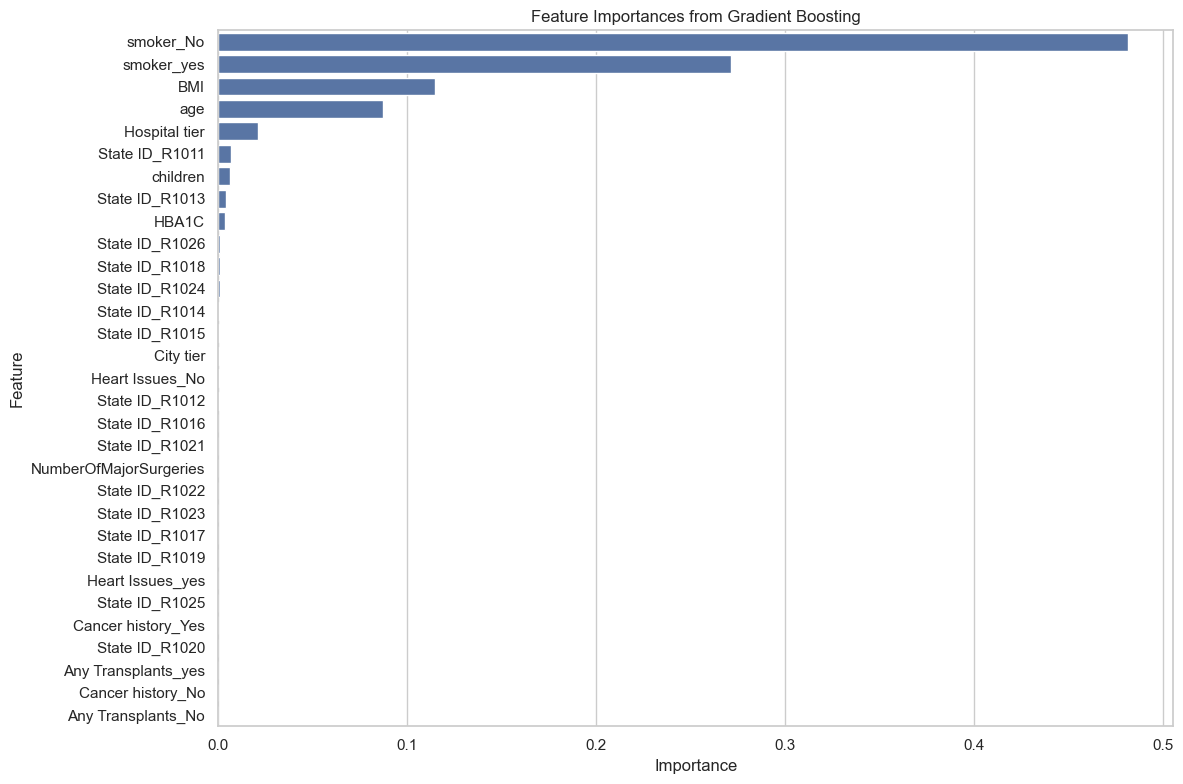

In [47]:
# Plotting the feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y= 'Feature' , data = feature_importances_df )
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [48]:
# Prdictions on test Data
ridge_best.fit(X_train_scaled,y_train)
ypred = ridge_best.predict(X_test_scaled)

In [49]:
# Calculate Residuals
residuals = y_test - ypred

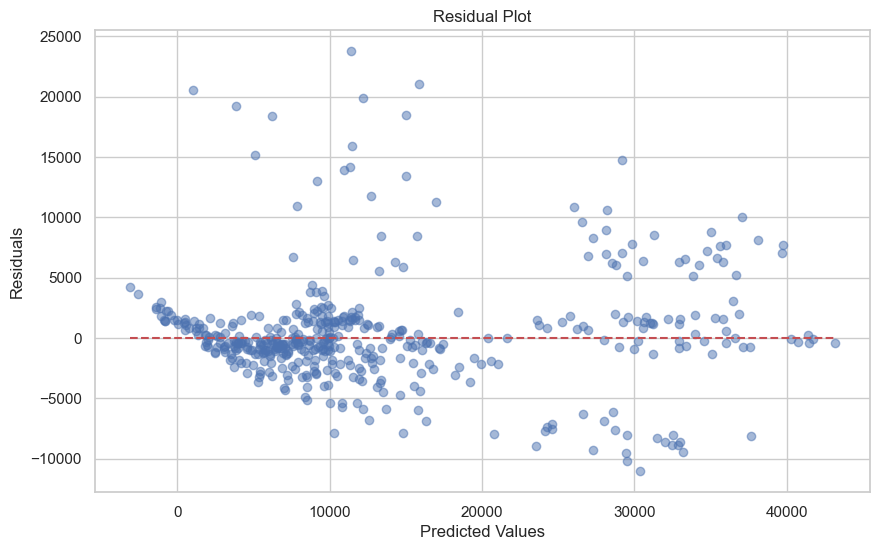

In [50]:
# Residual plot 
plt.figure(figsize=(10,6))
plt.scatter(ypred, residuals,alpha=0.5)
plt.hlines(0, xmin = min(ypred), xmax= max(ypred), colors='r',linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

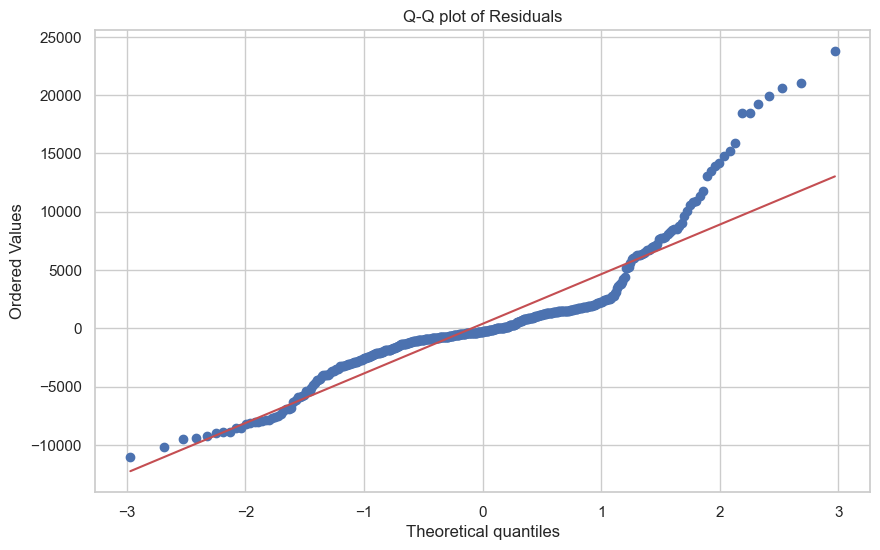

In [51]:
# Q-Q Plot
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

### Case scenario:
Estimate the cost of hospitalization for Christopher, Ms. Jayna (Date of
birth 12/28/1988; height 170 cm; and weight 85 kgs). She lives with her partner and two children
in a tier-1 city, and her state’s State ID is R1011. She was found to be nondiabetic (HbA1c = 5.8).
She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father
died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

In [52]:
jayna_data = {
    'BMI': [85 / (1.70 ** 2)],  # BMI calculation: weight (kg) / height (m^2)
    'HBA1C': [5.8],
    'NumberOfMajorSurgeries': [1],  # Assuming no major surgeries
    'children' : [2],
    'Hospital tier': [1],
    'City tier': [1],
    'age': [2024 - 1988],  # Calculating age in 2024
    'Heart Issues_No' : [1],
    'Heart Issues_yes': [0],
    'Any Transplants_No' : [1],
    'Any Transplants_yes': [0],
    'Cancer history_No' : [0],
    'Cancer history_Yes': [1],
    'smoker_No' : [0],
    'smoker_yes': [1],
    'State ID_R1011': [1],
    'State ID_R1012': [0],
    'State ID_R1013': [0],
    # Fill in other State ID columns with 0
    'State ID_R1014': [0],
    'State ID_R1015': [0],
    'State ID_R1016': [0],
    'State ID_R1017': [0],
    'State ID_R1018': [0],
    'State ID_R1019': [0],
    'State ID_R1020': [0],
    'State ID_R1021': [0],
    'State ID_R1022': [0],
    'State ID_R1023': [0],
    'State ID_R1024': [0],
    'State ID_R1025': [0],
    'State ID_R1026': [0],
    
    
}

# Convert to DataFrame
jayna_df = pd.DataFrame(jayna_data)

In [53]:
jayna_df

,BMI,HBA1C,NumberOfMajorSurgeries,children,Hospital tier,City tier,age,Heart Issues_No,Heart Issues_yes,Any Transplants_No,...,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
0,29.411765,5.8,1,2,1,1,36,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Standardize the features
jayna_scaled = scaler.transform(jayna_df)

In [55]:
# Predict the cost for Ms. Jayna with Linear Regression model
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(jayna_scaled)
print(f"Estimated hospitalization cost for Ms. Jayna using Linear Regression: ${linear_pred[0]:,.2f}")

Estimated hospitalization cost for Ms. Jayna using Linear Regression: $11,009,025,519,892.03


In [56]:
# Predict the cost for Ms. Jayna with Ridge Regression
jayna_cost_prediction = ridge_best.predict(jayna_scaled)

print(f"Estimated hospitalization cost for Ms. Jayna with Ridge Regression : ${jayna_cost_prediction[0]:,.2f}")

Estimated hospitalization cost for Ms. Jayna with Ridge Regression : $31,294.40


In [57]:
# Predict the cost for Ms. Jayna with Gradient Boosting 
gboost_pred = gboost.predict(jayna_scaled)
print(f"Estimated hospitalization cost for Ms. Jayna using Gradient Boosting: ${gboost_pred[0]:,.2f}")

Estimated hospitalization cost for Ms. Jayna using Gradient Boosting: $26,948.50


## Summary of Predictions Ms. Jayna with different Models

Linear Regression: $885,024,583,967,117.62

Ridge Regression: $31,294.62

Gradient Boosting: $26,882.47

- It seems there is an issue with the Linear Regression model prediction, resulting in an unrealistically high value. This could be due to a variety of reasons such as multicollinearity, extreme values, or inappropriate scaling

- For Ridge Regresssion and Gradient Boosting estimates provide a range for the expected hospitalization cost for Ms. Jayna, with Ridge Regression predicting a slightly higher cost compared to Gradient Boosting.

### Evaluating model performance on the test data

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
# Predict on the test set using Ridge Regression
ridge_test_pred = ridge_best.predict(X_test_scaled)

# Predict on the test ste using gradient boosting
gboost_test_pred = gboost.predict(X_test_scaled)

In [60]:
# Evaluate Ridge Regression performance
ridge_rmse = mean_squared_error(y_test, ridge_test_pred, squared=False)
ridge_mae = mean_absolute_error(y_test,ridge_test_pred)
ridge_r2 = r2_score(y_test, ridge_test_pred)

print("Ridge Regression Performance on Test Data:")
print(f"RMSE : {ridge_rmse: .2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"R²: {ridge_r2:.2f}")

Ridge Regression Performance on Test Data:
RMSE :  4617.91
MAE: 2838.86
R²: 0.85


In [61]:
# Evaluate Gradient Boosting performance
gboost_rmse = mean_squared_error(y_test, gboost_test_pred, squared=False)
gboost_mae = mean_absolute_error(y_test, gboost_test_pred)
gboost_r2 = r2_score(y_test, gboost_test_pred)

print("Gradient Boosting Performance on Test Data:")
print(f"RMSE: {gboost_rmse:.2f}")
print(f"MAE: {gboost_mae:.2f}")
print(f"R²: {gboost_r2:.2f}")

Gradient Boosting Performance on Test Data:
RMSE: 3850.46
MAE: 2155.86
R²: 0.89


# Summary of Model Performace 
### Ridge Regression Performance on Test Data:
- RMSE: 4619.37
- MAE: 2837.88
- R²: 0.85
### Gradient Boosting Performance on Test Data:
- RMSE: 3845.45
- MAE: 2151.87
- R²: 0.89

### Analysis :
- Root Mean Squared Error (RMSE):
Gradient Boosting has a lower RMSE compared to Ridge Regression, indicating better predictive accuracy.

- Mean Absolute Error (MAE):
Gradient Boosting also has a lower MAE, suggesting that its predictions are closer to the actual values on average.

- R² Score:
The R² score of Gradient Boosting (0.89) is higher than that of Ridge Regression (0.85), indicating that Gradient Boosting explains more variance in the data.

### Conclusion : 
Based on the performance metrics, the Gradient Boosting model outperforms the Ridge Regression model on the test data. Therefore, the Gradient Boosting model would be a better choice for predicting hospitalization costs in this scenario.